In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import discretize

In [2]:
# import W-Team specific packages
import sys
sys.path.append('../')
import nuftio

In [3]:
from fnames import *

In [4]:
%matplotlib notebook

### DISCLAIMER

This notebook is only compatible with development branches of `discretize`


# NTAB Simulation Results

Note some good simulations:

- 70

In [5]:
sim = 70

In [6]:
ntab = os.path.join(getTargetDirName(sim), 'sim01{}.W31-0.2.trans.pH.red.ntab'.format(sim, sim))
mesh, models = nuftio.NuftMesh.readNuft(ntab)

<IPython.core.display.Javascript object>


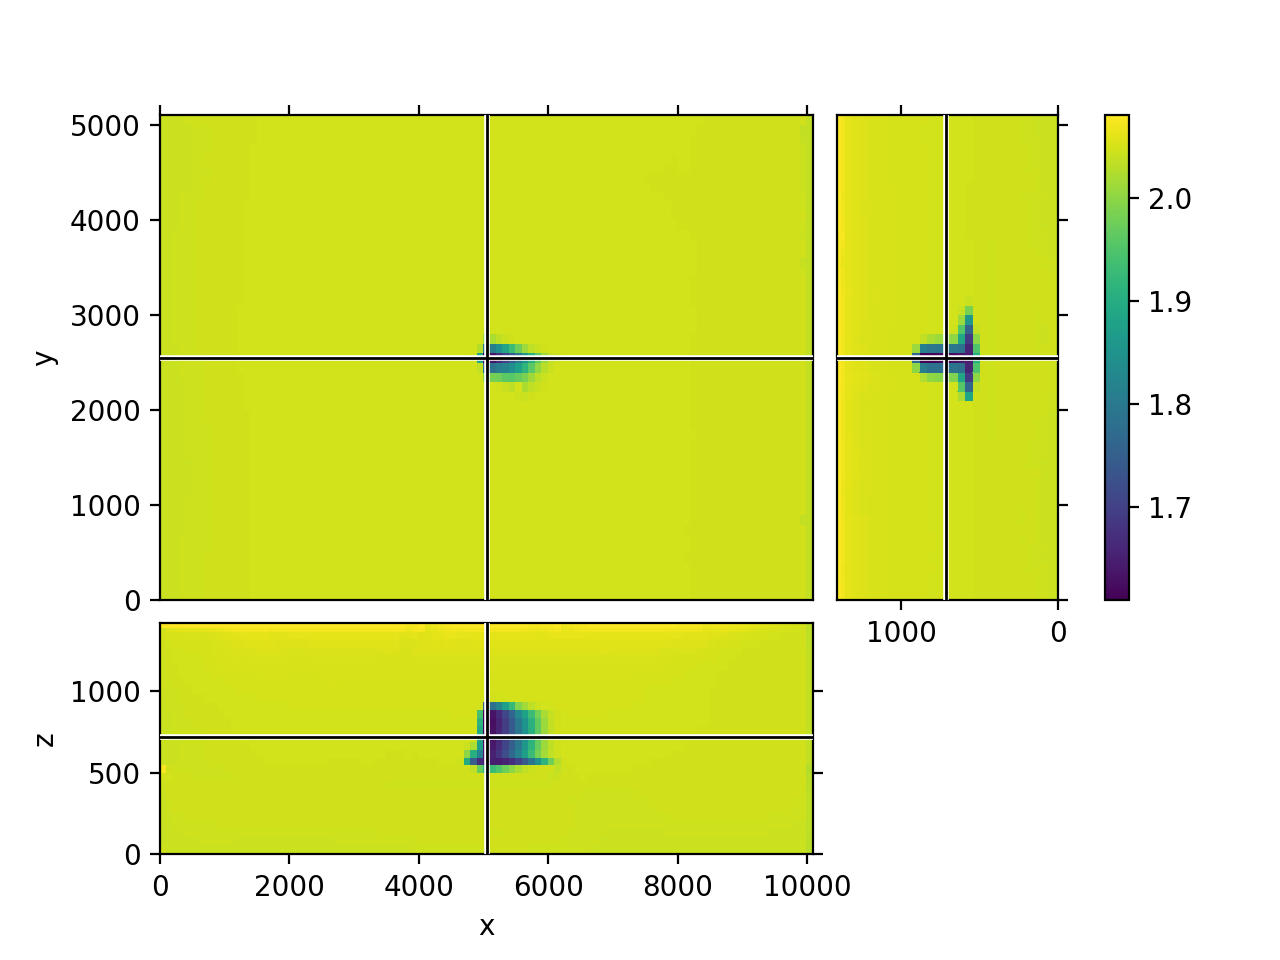

In [7]:
mesh.plot_3d_slicer(np.log(np.abs(models['200.0y'])))

# GenMesh Specification

In [8]:
mesh = discretize.MeshIO.load_mesh(getTMeshName(sim))
litho = np.loadtxt(getLithDefName(sim), comments='!')

<IPython.core.display.Javascript object>


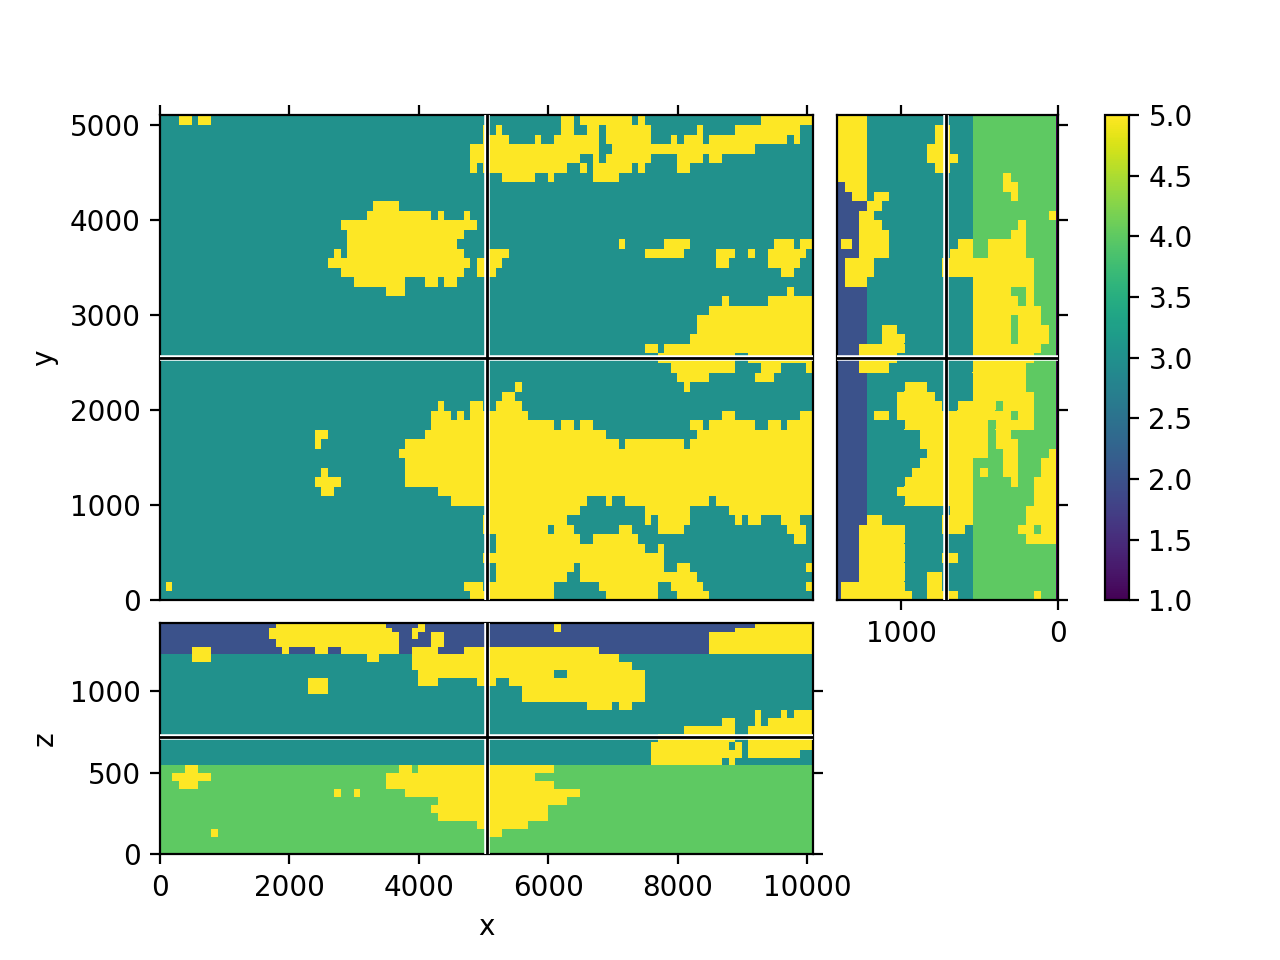

In [9]:
mesh.plot_3d_slicer(litho)